# Programming Assignment \# 1

__Goal:__ 

This programming assignment will ask you to do the following tasks.

(a) Implement some of the sorting algorithms for sorting integer data in ascending order in python3.
  - Simple sort (implemented for you)
  - Bubble Sort (read from book or online sources)
  - Merge Sort
  - Quicksort 
  
  
(b) Your implementation must count the number of *compare* operations each sorting algorithm carries out.
    
(c) You must formulate a series of arrays of lengths from $5$ to $100$  (step by 5), that will form the worst case of these
sorting algorithms and plot the number of comparisons in the __worst case__ vs. size of input array (x axis)
 
(d) Generate $1000$ random inputs for each size and compute average time. Plot the size of input array (x axis) vs. number of comparisons (y axis)

----
## Simple Sort

In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def simple_sort(a):
    # must sort the array a in place and return the number of comparisons
    num_compare = 0
    n = len(a)
    for i in range(0, n): # i goes from 0 to n-1
        for j in range(i+1, n): # j goes from i+1 to n-1
            num_compare = num_compare + 1
            if a[i] >= a[j]:
                # swap
                a[i], a[j] = a[j], a[i]
    return num_compare

In [3]:
# TESTING CODE
a = [3, 10, 1, 29, -1, 4, 3, 15, 2, -2]
nc = simple_sort(a)
print('Num Comparison = ', nc)
print('Sorted Result = ', a)

Num Comparison =  45
Sorted Result =  [-2, -1, 1, 2, 3, 3, 4, 10, 15, 29]


### Complexity analysis of simple sort.

Note that simple sort consists of two loops and regardless of the input array, the first loop runs from n steps. And the second loop runs $n-i-1$ steps where $i$ is the index of the first loop. Thus, the worst case, best case and average case complexity should be $\sum_{j=1}^{n-1} j = \frac{n(n-1)}{2}$ comparisons = $\Theta(n^2)$

The code below plots it for arrays of size 5, 10, ..., 100. However, we cannot really distinguish between the number of comparisons for randomized vs. worst case.

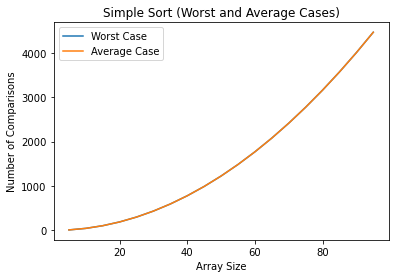

In [4]:
import random

# CODE TO GENERATE WORST CASE
array_sizes = range(5, 100, 5)
# Code for creating an already sorted array
def create_ascending_sorted_array(a_size):
    a = []
    for i in range(a_size):
        a.append(i)
    return a

# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a


# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = create_ascending_sorted_array(n)
    nc = simple_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = simple_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Simple Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----

### Bubble Sort

In [5]:
def bubble_sort(A):
    swap = True
    length = len(A)
    count = 0
    
    while swap:
        swap = False
        for i in range(0,length - 1):
            count += 1
            if A[i] > A[i + 1]:
                A[i], A[i + 1] = A[i + 1], A[i]
                swap = True
    return count

### Complexity Analysis of Bubble Sort

With bubble sort the worst and average case complexities are $\Theta\ (n^2)$. The worst case is if the array is already sorted in descending order. In this case the maximum number of comparisons are made because the numbers at the beginning and end have to be moved across the entire array. In an average case the number of times the second loop will be run will be equal to the furthest distance a number has to travel in the array. If the numbers are distributed randomly across the array this distance will be some fraction of $n$ or $C(n)*(n)$ where C is some constant less than one. Giving an average time of $\Theta\ (n^2)$. The best case is if it is alredy sorted in which case it only goes throu the loop once for $\Theta\ (n)$.

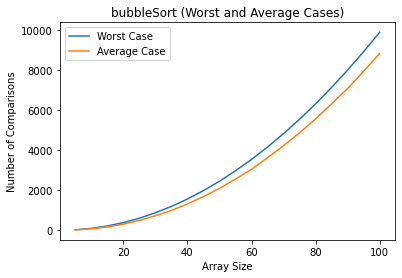

In [6]:
import random
def makeList(len, num, inc): #makes a list of numbers you can say how long, how many and if you want to increment lists

    masterList = []
    list = []
    for j in range(num):
        for i in range(len):
            list.append(random.randint(0,10000))
        masterList.append(list)
        list = []
        len += inc
    return masterList

wcBubbleSortLists = makeList(5,20,5)#makes an array of counts for worst case of bubble sort
wcBubbleCount = []
for lists in wcBubbleSortLists:
    lists.sort(reverse = True)
    wcBubbleCount.append(bubble_sort(lists))



bubbleCount = []
for i in range(5,105,5):#makes 1000 lists of length i
    bubbleSortLists = makeList(i,1000,0)#list of lists
    totalCount = 0
    count = 0
    
    for lists in bubbleSortLists:#runs every list through bubble sort.
        count = bubble_sort(lists)
        totalCount += count
    
    totalCount = totalCount / 1000
    bubbleCount.append(totalCount)

array_sizes = range(5, 105, 5)
plt.plot(array_sizes, wcBubbleCount, label='Worst Case')
plt.plot(array_sizes, bubbleCount, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('bubbleSort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----
### Merge Sort

In [40]:
def merge_sort(A): #initial call function that calls the recursive mergeSort
    count = 0
    end = len(A) - 1
    count = mergeSort(A,0,end, 0)
    return count
    
def merge(A, start, middle, end, count):
    startR = middle + 1 #start of the right list

    while((start <= middle) and (startR <= end)):
        
        if(A[start] <= A[startR]):

            count +=1
            start+=1
        else:
            count += 1
            value = A[startR]
            shifter = startR

            #shifts the values from start to startR to the right
            while(shifter != start):
                A[shifter] = A[shifter - 1]
                shifter -= 1
            
            #puts the original value of startR where it should be and updates various counts
            A[start] = value    
            start += 1
            middle += 1
            startR += 1
    return count

def mergeSort(A, start, end, count):
    if(start < end):
        middle = (start + end) // 2
            
        count = mergeSort(A,start, middle, count)
        count= mergeSort(A,middle +1, end, count)
        count = merge(A, start, middle, end, count)
    
    return count
    

def split(A):#sort of a reverse merge function
    
    left = []
    right = []

    for i in range(0, len(A)):
        if i % 2 == 0:
            left.append(A[i])
        if i % 2 == 1:
            right.append(A[i])
    return right, left
            
  
def worstCase(A): #as you can see by the graph theres a bug somewhere in here I have to track down

    if len(A) <= 1:
        return A
    left = []
    right = []
    value =[]

    right, left = split(A)
    left = worstCase(left)
    right = worstCase(right)
    value = left + right

    return value

### Complexity Analysis of Merge Sort

Using the master method, the best, worst and average cases for merge sort are $\Theta\ (nlog(n)$). The difference is going to be in the constant that is dropped before the asymptotical notation. Where this comes in to play is in the merge function where the values at two places in the list are being compared and merged.In the best case all the values in the right list will be greater than the left list and the minimum number of comparisons are made. In the worst case the values relationship will alternate (ie a[0]<b[0], a[1] > b[0], a[1] < b[1] …..) thus maximining the number of comparisons made. To get a list that will result in the worst case for merge sort you do just that. Take a sorted array and split it in to two where the a[0]<b[0], a[1] > b[0], a[1] < b[1] … relationship is observed. Then recursively do this to both half of the list and merge them all back together to get the worst case for merge sort.


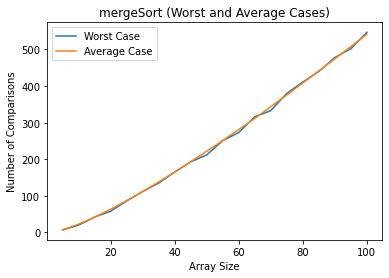

In [41]:
wcMergeSortLists = makeList(5,20,5)
wcMergeCount = []
for lists in wcMergeSortLists:
    wcList = worstCase(lists)
    wcMergeCount.append(merge_sort(wcList))


mergeCount = []
for i in range(5,105,5):
    mergeSortLists = makeList(i,1000,0)
    totalCount = 0
    count = 0
    
    for lists in mergeSortLists:
        count = merge_sort(lists)
        totalCount += count
    
    totalCount = totalCount / 1000
    mergeCount.append(totalCount)

array_sizes = range(5, 105, 5)
plt.plot(array_sizes, wcMergeCount, label='Worst Case')
plt.plot(array_sizes, mergeCount, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('mergeSort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----
### Quick Sort


In [42]:
def quick_sort(a):  #initial call function that calls the recursive quickSort
    start = 0
    end = (len(a) - 1)
    count = 0
    count = quickSort(a, start, end, count)
    return count

def myPartition(A, start, end, count): #uses the last value in the array as the pivot
    
    i = start - 1
    pivot = A[end]
    for j in range(start, (end)):
        count += 1
        if A[j] <= A[end]: #if the value is less than the pivot
            i += 1 #grow the less than sorted reagon
            A[i], A[j] = A[j], A[i] #swap the values
           
    A[i + 1], A[end] = A[end], A[i+1]
    
    return i + 1, count #returns pivot index
    
    
def quickSort(A, start, end, count):
    
    if len(A) == 1:
        return count
    
    if start < end:
        pi, count = myPartition(A, start, end, count)
        count = quickSort(A, start, (pi - 1),count)
        count = quickSort(A,(pi + 1), (end),count)
        
    return count


### Complexity Analysis of Quick Sort

As per the video the average case for quick sort will be $\Theta\ (nlog(n)$). The worst case will be $\Theta\ (n^2)$. The worst case occurs in ascending sort if the largest value is always picked as the pivot. This is because it the largest number is picked quick sort will run through the entire list and partition everything on the left of the pivot in $n$ time. Then it will do this again for every value in the list or n times including the first. This then gives us $\Theta\ (n^2)$ as our time.


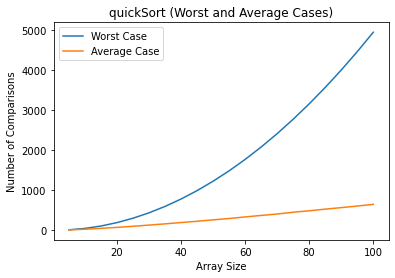

In [43]:
wcQuickSortLists = makeList(5,20,5)
wcQuickCount = []
for lists in wcQuickSortLists:
    lists.sort()
    wcQuickCount.append(quick_sort(lists))


quickCount = []
for i in range(5,105,5):
    quickSortLists = makeList(i,1000,0)
    totalCount = 0
    count = 0
    
    for lists in quickSortLists:
        count = quick_sort(lists)
        totalCount += count
    
    totalCount = totalCount / 1000
    quickCount.append(totalCount)

array_sizes = range(5, 105, 5)
plt.plot(array_sizes, wcQuickCount, label='Worst Case')
plt.plot(array_sizes, quickCount, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('quickSort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

-----
## Testing Code: Do not edit



In [44]:
def test_sorting_algorithm(sort_fun, sz, num_trials):
    num_passed = 0
    for i in range(num_trials):
        a = create_random_shuffled_array(sz)
        a_orig = list(a) # make a copy
        b = sorted(a)
        nc = sort_fun(a)
        if a == b:
            num_passed = num_passed + 1
        else:
            print('----')
            print('FAILED: Input = ', a_orig)
            print('Expected: ', b)
            print('Obtained:', a)
            print('----')
    print('Num Trials = ', num_trials)
    print('Num Passed = ', num_passed)

In [45]:
test_sorting_algorithm(simple_sort, 50, 100)

Num Trials =  100
Num Passed =  100


In [46]:
test_sorting_algorithm(bubble_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [47]:
test_sorting_algorithm(merge_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [48]:
test_sorting_algorithm(quick_sort, 10, 10)

Num Trials =  10
Num Passed =  10
